In this activity, we're going to use decision trees to determine the redshifts of galaxies from their photometric colours. We'll use galaxies where accurate spectroscopic redshifts have been calculated as our gold standard.

The flux magnitudes from the Sloan Digital Sky Survey (SDSS) catalogue will be used to create colour indices. Flux magnitudes are the total flux (or light) received in five frequency bands (u, g, r, i and z).

* u - ultraviolet light
* g - blue and green visible light
* r - yellow and red visible light
* i - near-infrared light
* z - near-infrared light


<p>Colours correspond to the wavelengths of the light we observe. Longer wavelengths appear red and shorter wavelengths appear blue or violet. Similarly, the astronomical colour (or colour index) is the difference between the magnitudes of two filters, i.e. u - g or i - z.

### Steps:

* Creating features and targets
* Using the features & targets to train the decision tree
* Calculating the median difference between the predictions generated by the model and the actual values to see how well the model is performing
* Splitting data into training and test subsets
* Cross validate using KFold

## Task i - Features and Targets

Write a `get_features_targets` function that splits the training data into input `features` and their corresponding `targets`. In our case, the inputs are the 4 colour indices and our targets are the corresponding redshifts.
<br></br>
Your function should return a tuple of:
* `features`: a NumPy array of dimensions m ⨉ 4, where m is the number of
galaxies;
* `targets`: a 1D NumPy array of length m, containing the redshift for each galaxy.

<br></br>
The data argument will be the structured array described on the previous slide. The ```u``` flux magnitudes and redshifts can be accessed as a column with ```data['u']``` and ```data['redshift']```.
The four features are the colours `u - g, g - r, r - i` and `i - z`.


Data can be downloaded [here](https://https://groklearning-cdn.com/modules/caY8ePiZWoRychNcEemjzK/sdss_galaxy_colors.npy)

In [112]:
# import library
import numpy as np

# upload data to Colab
sdss_data = np.load('sdss_galaxy_colors.npy')
# print(data['redshift'])

In [113]:
# first look

sdss_data

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 0.00006544),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 0.00001187),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 0.00002184),
       ...,
       (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 0.00002159),
       (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 0.00045059),
       (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 0.00006203)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [114]:
# first row of data

print(sdss_data[0])

(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301, 0.00006544)


In [115]:
sdss_data.shape, sdss_data.size, sdss_data.ndim

((50000,), 50000, 1)

In [116]:
# Get data from redshift column

sdss_data['redshift']

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

In [117]:
# suppress numpy to print out as scientific notation
np.set_printoptions(suppress=True)

In [118]:
def get_features_targets(data):

  # create an array filled with zero of the same shape as the input parameter
  # name it features
  features = np.zeros((data.shape[0],4))

  # fill in the values with colour indices
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']

  # identify target
  targets = data['redshift']

  return features,targets


In [119]:
  # call function
  features, targets = get_features_targets(sdss_data)

  # check results
  print(features[:2])
  print(targets[:2])

[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


### Learnings:

*   How to create an empty array - ```np.zero(x)```
>> -Return a new array of given shape and type, filled with zeros.
>> <br>-For example s = (2, 2) >> np.zeros(s) will create array ([[0., 0.], [0., 0.]])
>> <br>https://numpy.org/doc/stable/reference/generated/numpy.zeros.html


*   ```Pass``` statement
>> -The pass statement is used as a placeholder for future code.
>> <br>-When the pass statement is executed, nothing happens, but you avoid getting an error when empty code is not allowed.
>> <br>-Empty code is not allowed in loops, function definitions, class definitions, or in if statements.
>> <br>https://www.w3schools.com/python/ref_keyword_pass.asp#:~:text=Definition%20and%20Usage,definitions%2C%20or%20in%20if%20statements

*   How to suppress print out in scientific notation - ```np.set_printoptions```
>> -np.set_printoptions(suppress=True, #optional precision=None or the # of digits you want)
>> - for example, "```np.set_printoptions(suppress=True, precision=6)```"
>> - print format for floats: "```print(f'{a:f}')```"
>>>>```a = 0.0000000000000000001```
>>>>```b = np.array([a])```
>>>>```print(f'{a:f}')```
>>>>```print(b)```
>>>>```# 0.000000```
>>>>```# [0.]```<br>
>> - https://numpy.org/doc/stable/reference/generated/numpy.set_printoptions.html



---



## Task ii - Train the decision tree

Use the above features and targets to train a decision tree and then make a prediction. We are going to use the [DecisionTreeRegressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) class from the ```sklearn.tree``` module.

The decision tree regression learning algorithm is initialised with:

> ```dtr = DecisionTreeRegressor()```


To train the model, we use the fit method with the features and targets we created earlier:
> ```dtr.fit(features, targets)```

The decision tree is now trained and ready to make a prediction:

> ```predictions = dtr.predict(features)```

```predictions``` is an array of predicted values corresponding to each of the input variables in the array.

Your task is to put this together for our photometric redshift data.

Your first 4 predictions should print this:
* ```[ 0.539301    0.1645703   0.04190006  0.04427702]```

In [120]:
# import libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Use get_features_target function from above
def get_features_targets(data):
  features = np.zeros((data.shape[0],4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']

  targets = data['redshift']

  return features,targets

# load the data and generate the features and targets
sdss_data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(sdss_data)

# initialise model
dtr = DecisionTreeRegressor()

# train the model
dtr.fit(features, targets)

# make predictions using the same features
predictions = dtr.predict(features)

# print out the first 4 predicted redshifts
print(predictions[:4])

[0.539301   0.1645703  0.04190006 0.04427702]




---



##Task iii - Calculating the median difference



In regression we compare the predictions generated by our model with the actual values to test how well our model is performing. The difference between the predicted values and actual values (sometimes referred to as residuals) can tell us a lot about where our model is performing well and where it is not.

While there are a few different ways to characterise these differences, in this tutorial we will use the median of the differences between our predicted and actual values. This is given by:

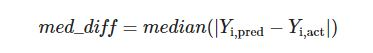

In this problem we will implement the function ```median_diff```. The function should calculate the median residual error of our model, i.e. the median difference between our predicted and actual redshifts.

The ```median_diff``` function takes two arguments – the predicted and actual/target values. When we use this function later in the tutorial, these will corresponding to the predicted redshifts from our decision tree and their corresponding measured/target values.

The median of differences should be calculated according to the formula shown above.

In [121]:
# Write a function

def median_diff(predicted, actual):

  diff_all = predicted[:] - actual[:]
  diff_median = np.median(np.abs(diff_all))

  return diff_median

### Learnings: Importance of `abs`

The <b>absolute value</b> of a variable x is represented by |x| which is pronounced as 'Mod x' or 'Modulus of x'. 'Modulus' is a Latin word, which means 'measure'. Absolute value is commonly referred to as numeric value or magnitude. The absolute value represents only the numeric value and does not include the sign of the numeric value. The modulus of any vector quantity is always taken as positive and is its absolute value. Also, quantities like distance, price, volume, and time, are always represented as absolute values.

As an example the absolute value: |+5| = |-5| = 5. There is no sign assigned to absolute value. In this article, we will explore the concept of the absolute value of a number, its symbol, and how to find the absolute value. We will solve various examples based on the concept for a better understanding.What is absolute value?

<b>What is Absolute Value?</b>
<br>The absolute value of a number is its distance from the origin 0. We know that distance is always a non-negative quantity. Since the absolute value is a distance, the absolute value of a number is always a non-negative number. Sometimes a sign is attributed to a numeric value to signify the direction, in addition to the value. The increase or a decrease of a quantity, values above or below the mean value, profit, or loss in a transaction, is sometimes explained by assigning a positive or negative value to the numeric value. But for absolute value, the sign of the numeric value is ignored and only the numeric value is considered.
https://www.cuemath.com/algebra/absolute-value/

Why it's important to use ``abs`` here. See example below.


In [ ]:
#targets = [0.539301, 0.1645703,0.04190006, 0.04427702,  0.04164413]
#pred = [1.58408198614, 0.167693198594, 0.0834927774863,0.0835627826667,0.113421467729]

In [122]:
import numpy as np

# creating an empty array
targets = np.zeros(5)
pred = np.zeros(5)
pred_n = np.zeros(5)

# filling out values to those arrays. Note the negative value of pred_n[0] vs pred[0]
targets[0] = 0.539301
targets[1] = 0.1645703
targets[2] = 0.04190006
targets[3] = 0.04427702
targets[4] = 0.04164413
pred[0] = 1.58408198614
pred[1] = 0.167693198594
pred[2] = 0.0834927774863
pred[3] = 0.0835627826667
pred[4] = 0.113421467729
pred_n[0] = -1.58408198614
pred_n[1] = 0.167693198594
pred_n[2] = 0.0834927774863
pred_n[3] = 0.0835627826667
pred_n[4] = 0.113421467729

targets, pred, pred_n

(array([0.539301  , 0.1645703 , 0.04190006, 0.04427702, 0.04164413]),
 array([1.58408199, 0.1676932 , 0.08349278, 0.08356278, 0.11342147]),
 array([-1.58408199,  0.1676932 ,  0.08349278,  0.08356278,  0.11342147]))

##### Notice the difference in results

In [123]:
# difference between prediction vs targets
all_diff = pred - targets

# difference between prediction with negative value vs targets
all_diff_n = pred_n - targets

# results of the two
np.median(all_diff), np.median(all_diff_n)

(0.0415927174863, 0.0392857626667)

 Absolute values are often used in problems involving <b>distance</b> and are sometimes used with <b>inequalities</b>. Later we will discuss graphs of absolute value equations and inequalities. https://www.brightstorm.com/math/algebra/absolute-value/definitions-and-applications-of-absolute-value/



---



## Task iv - Validating our model

We previously used the same data for training and testing our decision trees.

This gives an <b>unrealistic estimate</b> of how accurate the model will be on previously unseen galaxies because the model has been optimised to get the best results on the training data.

The simplest way to solve this problem is to split our data into <i><b>training</b></i> and <i><b>testing</b></i> subsets.

<b>Task:</b> In this problem, we will use ```median_diff``` from the previous question to validate the decision tree model. Building from previous exercises, your task is to write the ```validate_model``` function.

The function should split the ```features``` and ```targets``` into train and test subsets, like this 50:50 split for features:

In [ ]:
split = features.shape[0]//2
train_features = features[:split]
test_features = features[split:]

Your function should then use the training split (```train_features``` and ```train_targets```) to train the model.

Finally, it should measure the accuracy of the model using ```median_diff``` on the ```test_targets``` and the predicted redshifts from ```test_features```.

The function should take 3 arguments:

* ```model``` - the decision tree regressor;
* ```features``` - the features for the data set;
* ```targets``` - The targets for the data set.

In [124]:
# import libraries
import numpy as np

# load data to workbook
sdss_data = np.load('sdss_galaxy_colors.npy')

# create host array with the same shape as data for features
features = np.zeros((sdss_data.shape[0],4))

# load features data to the host array
features[:, 0] = sdss_data['u'] - sdss_data['g']
features[:, 1] = sdss_data['g'] - sdss_data['r']
features[:, 2] = sdss_data['r'] - sdss_data['i']
features[:, 3] = sdss_data['i'] - sdss_data['z']

# suppress numpy to print out as scientific notation
np.set_printoptions(suppress=True)

# check how it looks like
features

array([[0.31476, 0.0571 , 0.28991, 0.07192],
       [1.2002 , 0.82026, 0.45294, 0.24665],
       [1.65941, 0.83499, 0.40482, 0.31266],
       ...,
       [1.72629, 0.93905, 0.58173, 0.38205],
       [0.23287, 0.18255, 0.29391, 0.01844],
       [0.19067, 0.03655, 0.04639, 0.00023]])

In [125]:
# Process 1 - Check the shape of features array
features.shape[0]

# Process 2 - find mid point
split = features.shape[0]//2

# Process 3 - define second half as test, starting from mid point to the rest
test_features = features[split:]

# Process 4 - define first half as train, starting from beginning to mid point
train_features = features[:split]

features.shape[0], test_features, train_features

(50000,
 array([[ 1.17246,  0.51141,  0.34615,  0.18326],
        [ 0.66468,  0.426  ,  0.01132, -0.98421],
        [ 1.1905 ,  0.24526,  0.11386,  0.09205],
        ...,
        [ 1.72629,  0.93905,  0.58173,  0.38205],
        [ 0.23287,  0.18255,  0.29391,  0.01844],
        [ 0.19067,  0.03655,  0.04639,  0.00023]]),
 array([[0.31476, 0.0571 , 0.28991, 0.07192],
        [1.2002 , 0.82026, 0.45294, 0.24665],
        [1.65941, 0.83499, 0.40482, 0.31266],
        ...,
        [1.43782, 0.65646, 0.39566, 0.25188],
        [1.98752, 0.93992, 0.42997, 0.31977],
        [2.22908, 1.09192, 0.5319 , 0.39419]]))

In [127]:
# Now for Targets

# identify targets array by assigning redshift value from dataset above
targets = sdss_data['redshift']
targets

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

In [128]:
# Process 1 - Check the shape of targets array
targets.shape[0]

# Process 2 - find mid point
split_targets = targets.shape[0]//2

# Process 3 - define second half as test, starting from mid point to the rest
test_targets = targets[split_targets:]

# Process 4 - define first half as train, starting from beginning to mid point
train_targets = targets[:split_targets]

targets.shape[0], test_targets, train_targets

(50000,
 array([0.05952106, 0.01724364, 0.03126672, ..., 0.0784592 , 1.567295  ,
        0.4749449 ]),
 array([0.539301  , 0.1645703 , 0.04190006, ..., 0.08394714, 0.08443163,
        0.0832296 ]))

In [129]:
# this is the first half, starts at 0, ends at position 25000th
targets[:targets.shape[0]//2]

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.08394714, 0.08443163,
       0.0832296 ])

In [130]:
# this is second half, starts at position 25000th, ends at the end
targets[targets.shape[0]//2:]

array([0.05952106, 0.01724364, 0.03126672, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

In [131]:
# import libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# use the get_features_targets function from previously
def get_features_targets(data):
  features = np.zeros((data.shape[0],4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features,targets


# median_diff function here
def median_diff(predicted, actual):
  diff_all = predicted[:] - actual[:]
  diff_median = np.median(np.abs(diff_all))
  return diff_median

# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff

def validate_model(model, features, targets):
  # split the data into training and testing
  # features
  split_f = features.shape[0]//2
  train_features = features[:split_f] # top half
  test_features = features[split_f:] # bottom half
  # targets
  split_t = targets.shape[0]//2
  train_targets = targets[:split_t] # top half
  test_targets = targets[split_t:] # bottom half

  # initialise and train the decision tree
  dtr = DecisionTreeRegressor()
  dtr.fit(train_features, train_targets)

  # get the predicted_redshifts & get a set of prediction from the test input features
  predictions = dtr.predict(test_features)

  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)

In [135]:
features, targets = get_features_targets(sdss_data)

In [137]:
validate_model(dtr, features, targets)

0.021890559999999996



---



## Task v - Colour-Colour Redshift Plot

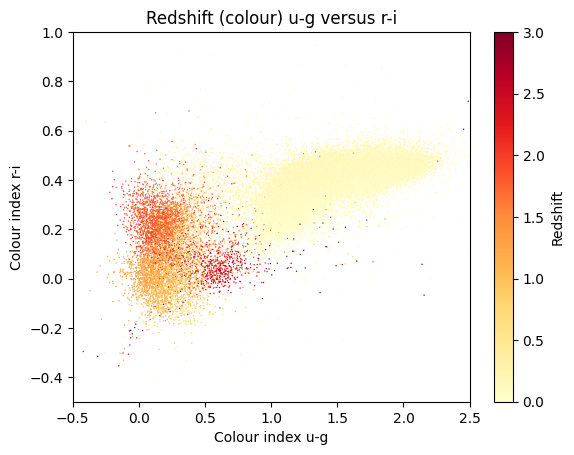

In [138]:
# import libraries

import numpy as np
from matplotlib import pyplot as plt

# load the data and generate the features and targets
sdss_data = np.load('sdss_galaxy_colors.npy')

# create feature array
features = np.zeros((sdss_data.shape[0],4))
features[:, 0] = sdss_data['u'] - sdss_data['g']
features[:, 1] = sdss_data['g'] - sdss_data['r']
features[:, 2] = sdss_data['r'] - sdss_data['i']
features[:, 3] = sdss_data['i'] - sdss_data['z']
targets = sdss_data['redshift']

# Complete the following to make the plot
cmap = plt.get_cmap('YlOrRd')

# Define our colour indexes u-g and r-i
x = features[:, 0]
y = features[:, 2]
# Make a redshift array
redshift_arr = targets

# Create the plot with plt.scatter and plt.colorbar
plt.scatter(x, y, s=1, c=redshift_arr, linewidths=0, cmap=cmap)
plt.colorbar(label="Redshift", orientation="vertical")

# Define your axis labels and plot title
plt.title('Redshift (colour) u-g versus r-i')
plt.xlabel('Colour index u-g')
plt.ylabel('Colour index r-i')

# Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.0)
plt.clim(0.0, 3.0)

plt.show()

### Learnings:



*   How to add Title and labels:


> ```- plt.title('Title here')```<br>
> ```- plt.xlabel('x label here')```<br>
> ```- plt.ylabel('y label here')```


*   How to set value limits on axis and colour bar:

> ```- plt.xlim(left value, right value)```<br>
> ```- plt.ylim(bottom value, top value)```<br>
> ```- plt.clim(bottom value, top value)```
<font size="1.5"><br>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html
<br>https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib/</font>

*   How to plot with plt.scatter:

> ```- s = The marker size in points**2 (typographic points are 1/72 in.). Or thickness of the point```<br>
> ```- c = array-like or list of colors or color```<br>
> ```- linewidths = The linewidth of the marker edges. Note: The default edgecolors is 'face'. You may want to change this as well. Default is 1.5```<br>
> ```- cmap = The Colormap instance or registered colormap name used to map scalar data to colors. This parameter is ignored if c is RGB(A)```<br>
<font size="1.5">https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html<br>
https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/<br></font>






---



## Task vi - Overfitting Trees

Complete the function ```accuracy_by_treedepth```. The function should return the median difference for both the testing and training data sets for each of the tree depths in ```depths```.

```accuracy_by_treedepth``` should take the following arguments:


*   ```features``` and ```targets``` (as in previous problems);
*   ```depths```: an array of tree depths to be used as the max_depth of the decision tree regressor.


Your function should return two lists (or arrays) containing the ```median_diff``` values for the predictions made on the training and test sets using the maximum tree depths given by the ```depths```.

For example, if ```depths``` is [3, 5, 7], then your function should return two lists of length 3. You can choose the size of the split between your testing and training data (if in doubt, 50:50 is fine).

We've included code to plot the differences as a function of tree depths. You should take a moment to familiarise yourself with what each line is doing.

In [139]:
# accuracy_by_treedepth function

def accuracy_by_treedepth(features, targets, depths):

  # split the data into testing and training sets
  split_f = features.shape[0]//2
  train_features = features[:split_f] # top half
  test_features = features[split_f:] # bottom half

  split_t = targets.shape[0]//2
  train_targets = targets[:split_t] # top half
  test_targets = targets[split_t:] # bottom half

  # placeholder for train and validation set
  accuracy_arr_train = []
  accuracy_arr_test = []

  # loop through depths
  for depth in tree_depths:

    # initialize model with the maximum depth.
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(train_features, train_targets)

    # get the predictions for the training set and calculate their median_diff
    predictions_train = dtr.predict(train_features)
    train_med_diffs = np.median(np.abs(predictions_train[:] - train_targets[:]))
    accuracy_arr_train.append(train_med_diffs)

    # get the predictions for the testing set and calculate their median_diff
    predictions_test = dtr.predict(test_features)
    test_med_diffs = np.median(np.abs(predictions_test[:] - test_targets[:]))
    accuracy_arr_test.append(test_med_diffs)

  # return the accuracies for the training and testing sets

  return accuracy_arr_train, accuracy_arr_test


In [140]:
# define tree_depths
tree_depths = [i for i in range(1, 30, 2)]


In [141]:
# Call the function
train_median_diffs, test_median_diffs = accuracy_by_treedepth(features, targets, tree_depths)
print("Depth with lowest median difference : {}".format(tree_depths[test_median_diffs.index(min(test_median_diffs))]))

Depth with lowest median difference : 21


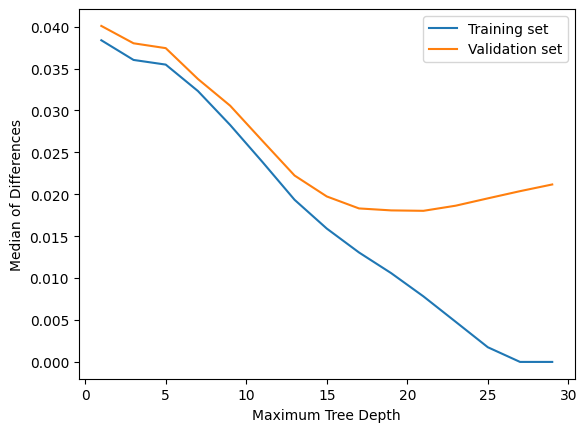

In [142]:
# Plot the results
train_plot = plt.plot(tree_depths, train_median_diffs, label='Training set')
test_plot = plt.plot(tree_depths, test_median_diffs, label='Validation set')
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Median of Differences")
plt.legend()
plt.show()



---



## Task vii - KFold Cross Validation

Your task is to complete the function ```cross_validate_model```. The function takes 4 arguments:


*   ```model, feaures```, and ```targets``` as in previous problems;
*   ```k in our k-fold```. This is the number of subsets to train and test


Your function should return a list containing the k median of differences for each of the k folds using ```median_diff```.

Note that we have set the ```max_depth=21``` when we initialise the decision tree to prevent the model from overfitting.

<b>KFolds usage</b>
<br>We have created the ```KFold object``` to give you a set of training and testing indices for each of the k runs. It is worth taking a moment to understand this.

Specifically, the object is initialised with:

In [ ]:
kf = KFold(n_splits=k, shuffle=True)

The ```n_splits=k``` passes our desired number of subsets/folds. We want to shuffle the data (as previously explained). The iterator is then used with:

In [ ]:
for train_indices, test_indices in kf.split(features):

The ```kf.split(features)``` is an iterator that, for each of the k iterations, returns two arrays of indices to be used with our feature and target arrays, i.e. ```features[train_indices],targets[train_indices]```

In [143]:
# neccessary libraries:

import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# load the data and generate the features and targets
sdss_data = np.load('sdss_galaxy_colors.npy')

In [144]:
# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

In [145]:
get_features_targets(sdss_data)

(array([[0.31476, 0.0571 , 0.28991, 0.07192],
        [1.2002 , 0.82026, 0.45294, 0.24665],
        [1.65941, 0.83499, 0.40482, 0.31266],
        ...,
        [1.72629, 0.93905, 0.58173, 0.38205],
        [0.23287, 0.18255, 0.29391, 0.01844],
        [0.19067, 0.03655, 0.04639, 0.00023]]),
 array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
        0.4749449 ]))

In [146]:
# paste your median_diff function here
def median_diff(predicted, actual):

  diff_all = predicted[:] - actual[:]
  diff_median = np.median(np.abs(diff_all))
  return diff_median

In [147]:
# complete this function

def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  diffs = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]

    # fit the model for the current set
    # if you use dfr.fit it'll give an error in GROK
    model.fit(train_features, train_targets)

    # predict using the model
    predictions = model.predict(test_features)

    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions, test_targets))


  # return the list with your median difference values
  return diffs

In [148]:
# call your cross validation function
dtr = DecisionTreeRegressor(max_depth=21)
diffs = cross_validate_model(dtr, features, targets, 10)
diffs

[0.017431704999999992,
 0.01806313296668989,
 0.01790669182748643,
 0.01835351133832565,
 0.017778025357142867,
 0.016930610550561796,
 0.017126217604166674,
 0.01764329714335673,
 0.0172871095115681,
 0.017442132142857135]

In [149]:
print('Differences: {}'.format(', '.join(['{:.3f}'.format(val) for val in diffs])))
print('Mean difference: {:.3f}'.format(np.mean(diffs)))

Differences: 0.017, 0.018, 0.018, 0.018, 0.018, 0.017, 0.017, 0.018, 0.017, 0.017
Mean difference: 0.018




---



## Task viii - KFold Cross Validated Predictions

Complete the function ```cross_validate_predictions```.

This is very similar to the previous question except instead of returning the ```med_diff``` accuracy measurements we would like to return a predicted value for each of the galaxies.

The function takes the same 4 arguments as the previous question, i.e. ```model, feaures, targets``` and ```k```.

Your function should return a single variable. The returned variable should be a 1-D numpy array of length  ```m```, where ```m``` is the number of galaxies in our data set. You should make sure that you maintain the order of galaxies when giving your predictions, such that the first prediction in your array corresponds to the first galaxy in the ```features``` and ```targets``` arrays.

In [150]:
# necessary starters

import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# load the data and generate the features and targets
sdss_data = np.load('sdss_galaxy_colors.npy')

In [151]:
# paste your get_features_targets function here

def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

In [152]:
get_features_targets(sdss_data)

(array([[0.31476, 0.0571 , 0.28991, 0.07192],
        [1.2002 , 0.82026, 0.45294, 0.24665],
        [1.65941, 0.83499, 0.40482, 0.31266],
        ...,
        [1.72629, 0.93905, 0.58173, 0.38205],
        [0.23287, 0.18255, 0.29391, 0.01844],
        [0.19067, 0.03655, 0.04639, 0.00023]]),
 array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
        0.4749449 ]))

In [153]:
# paste your median_diff function here
def median_diff(predicted, actual):

  diff_all = predicted[:] - actual[:]
  diff_median = np.median(np.abs(diff_all))
  return diff_median

In [154]:
# complete this function

def cross_validate_predictions(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # declare an array for predicted redshifts from each iteration
  all_predictions = np.zeros_like(targets)

  for train_indices, test_indices in kf.split(features):
    # split the data into training and testing
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]


    # fit the model for the current set
    model.fit(train_features, train_targets)

    # predict using the model
    predictions = model.predict(test_features)

    # put the predicted values in the all_predictions array defined above
    all_predictions[test_indices] = predictions

  # return the predictions
  return all_predictions

In [155]:
# call your cross validation function
predictions = cross_validate_predictions(dtr, features, targets, 10)

# calculate and print the rmsd as a sanity check
diffs = median_diff(predictions, targets)
print('Median difference: {:.3f}'.format(diffs))

Median difference: 0.018


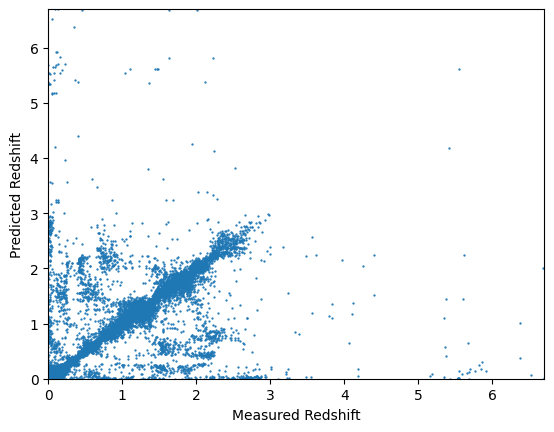

In [156]:
# plot the results to see how well our model looks
plt.scatter(targets, predictions, s=0.4)
plt.xlim((0, targets.max()))
plt.ylim((0, predictions.max()))
plt.xlabel('Measured Redshift')
plt.ylabel('Predicted Redshift')
plt.show()

### Learnings:



*   What is ```np.zeros_like```?


> ```np.zeros_like``` returns an array of zeros with the same shape and type as a given array
> <br>numpy.zeros_like(a, dtype=None, order='K', subok=True, shape=None)

<font size='2'>https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html</font>



---



## Task ix - Galaxies and QSOs

The database consists of two different populations: regular galaxies and quasi-stellar objects (QSOs).

QSOs are a type of galaxy that contain an actively (and intensely) accreting supermassive black hole. This is often referred to as an Active Galactic Nucleus (AGN).

The light emitted from the AGN is significantly brighter than the rest of the galaxy and we are able to detect these QSOs out to much higher redshifts. In fact, most of the normal galaxies we have been using to create our models have redshifts less than z
≈0.4, while the QSOs have redshifts all the way out to z≈6.

Due to this contribution from the AGN, the flux magnitudes measured at different wavelengths might not follow the typical profile we assumed when predicting redshifts.

In the next question we are going to look at whether there is a difference in the accuracy of the decision trees between QSOs and regular galaxies.


Write a function ```split_galaxies_qsos``` that splits our data containing both galaxies and QSOs into two arrays that contain only galaxies and QSOs respectively. Your function should take a single data argument.

The function should return two NumPy arrays, the first ```galaxies``` containing only rows from ```data``` that are galaxies and the second ```qsos``` containing only rows that are QSOs.

The ```data``` array contains a column ```data['spec_class']``` where the values will either be b'GALAXY' or b'QSO'.


In [157]:
# necessary starters

import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor

# load the data and generate the features and targets
sdss_data = np.load('sdss_galaxy_colors.npy')

In [158]:
# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

In [159]:
get_features_targets(sdss_data)

(array([[0.31476, 0.0571 , 0.28991, 0.07192],
        [1.2002 , 0.82026, 0.45294, 0.24665],
        [1.65941, 0.83499, 0.40482, 0.31266],
        ...,
        [1.72629, 0.93905, 0.58173, 0.38205],
        [0.23287, 0.18255, 0.29391, 0.01844],
        [0.19067, 0.03655, 0.04639, 0.00023]]),
 array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
        0.4749449 ]))

In [160]:
# paste your median_diff function here
def median_diff(predicted, actual):

  diff_all = predicted[:] - actual[:]
  diff_median = np.median(np.abs(diff_all))
  return diff_median

In [163]:
def cross_validate_model(model, features, targets, k):
  kf = KFold(n_splits=k, shuffle=True)

  # initialise a list to collect median_diffs for each iteration of the loop below
  diffs = []

  for train_indices, test_indices in kf.split(features):
    train_features, test_features = features[train_indices], features[test_indices]
    train_targets, test_targets = targets[train_indices], targets[test_indices]

    # fit the model for the current set
    # if you use dfr.fit it'll give an error in GROK
    model.fit(train_features, train_targets)

    # predict using the model
    predictions = model.predict(test_features)

    # calculate the median_diff from predicted values and append to results array
    diffs.append(median_diff(predictions, test_targets))

  # return the list with your median difference values
  return diffs

In [165]:
# complete this function

def split_galaxies_qsos(data):
  # split the data into galaxies and qsos arrays
  galaxies = sdss_data[sdss_data['spec_class'] == b'GALAXY']
  qsos = sdss_data[sdss_data['spec_class'] == b'QSO']

  # return the seperated galaxies and qsos arrays
  return galaxies, qsos

# provided by GROK
def cross_validate_median_diff(data):
  features, targets = get_features_targets(data)
  dtr = DecisionTreeRegressor(max_depth=21)
  return np.mean(cross_validate_model(dtr, features, targets, 10))

In [166]:
# Split the data set into galaxies and QSOs
galaxies, qsos= split_galaxies_qsos(sdss_data)

# Here we cross validate the model and get the cross-validated median difference
# The cross_validated_med_diff function is in "written_functions"
galaxy_med_diff = cross_validate_median_diff(galaxies)
qso_med_diff = cross_validate_median_diff(qsos)

# Print the results
print("Median difference for Galaxies: {:.3f}".format(galaxy_med_diff))
print("Median difference for QSOs: {:.3f}".format(qso_med_diff))

Median difference for Galaxies: 0.017
Median difference for QSOs: 0.075


In [167]:
len(galaxies), len(qsos)

(41475, 8525)

QSOs have a greater median residual ( ≈0.075) than the galaxies ( ≈0.017). There are a couple of possibilities why this is the case.

* There are far fewer QSOs than galaxies
* Galaxies aren't as bright as QSOs so they become too faint to be detected with SDSS at redshifts  ≈0.4. This creates a measurement bias.




---

